
**Heart Disease Prediction**

---

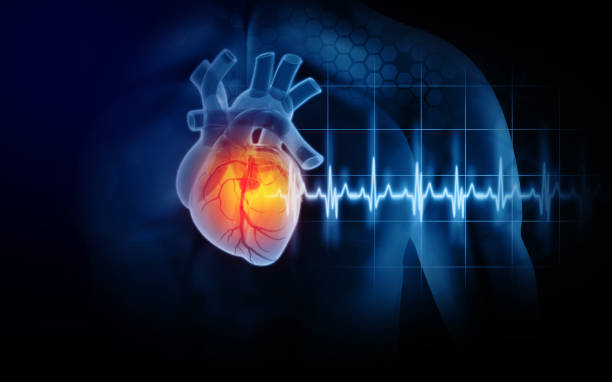

**Introduction:**

-> Heart disease is a broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred to as cardiovascular diseases. It is a major cause of disability all around the world.

-> Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well.

-> There are several different types and forms of heart disease. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart, and several others leading to heart failure and heart attack.



❤ ***Key facts according to WHO (World Health Organaizations)*** :->

---

↪ Cardiovascular diseases (CVDs) are the leading cause of death globally.

↪ An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

↪ Over three quarters of CVD deaths take place in low- and middle-income countries.

↪ Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.

↪ Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.

↪ It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

---

**1)  Exploratory Data Analysis :**

In [36]:
# import the require libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
import os
from IPython.core.display import HTML

In [11]:
# Read the dataset.

data = pd.read_csv('heart.csv')

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Note:** From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us.

**Understand about Datatypes:**

1) Gender:

*   1 = male


*  0 = female

2)  cp: chest pain type

* Value 0: typical angina

* Value 1: atypical angina

* Value 2: non-anginal pain

* Value 3: asymptomatic

3) trestbps: resting blood pressure (in mm Hg on admission to the hospital)

4) chol: serum cholestoral in mg/dl

5) fbs: (fasting blood sugar > 120 mg/dl)

* True = 1

* False = 0

6) restecg: resting electrocardiographic results

* Value 0: normal

* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

5) thalach: maximum heart rate achieved

6) exang: exercise induced angina

* 1 = yes

* 0 = No

7) oldpeak = ST depression induced by exercise relative to rest

8) slope: the slope of the peak exercise ST segment

* Value 0: upsloping


* Value 1: flat


* Value 2: downsloping

9) ca: number of major vessels (0-3) colored by flourosopy

10) thal:

* 0 = error (in the original dataset 0 maps to NaN's)
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect

11) target (the lable):

* 0 = no disease,
* 1 = disease




**Note on the target label:**

Diagnosis of heart disease (angiographic disease status)

Value 0: < 50% diameter narrowing

Value 1: > 50% diameter narrowing

**Data pre-processing**

In [17]:
data = data[data['ca'] < 4]                            #drop the wrong ca values
data = data[data['thal'] > 0]                          #drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!!')

The length of the data now is 296 instead of 303!!


In [18]:
# Borrow the column and rename to understand properly

data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [32]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [33]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [34]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


**Grouping the features:**


In [31]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

**Exploring Features/Target:**

Target distribution:

↪ We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

<ipython-input-41-6fa45a7136ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['target'], palette=mypal[1::4])


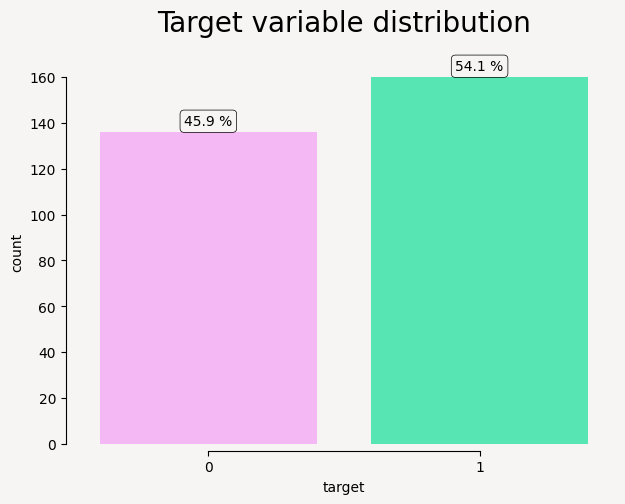

In [41]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [45]:
# For statistical summary:

data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


**Based on Statistical Summary:**

---

--> The average **age** in the datasets is 54.5 and max is 77 year and younge age is 29.

--> The average registered **cholestrol** level is 247.15
Maximum level is 564 and the minimum level is 126.

**Note**: According to WHO, a healthy cholesterol level is  <200mg/dl
  and usually high level of cholesterol is associated with heart disease.

-->**Resting blood pressure** , mean is 131 , 200 max and 94 min.

--> The average max **heart rate** registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.

--> The average value of **st_dpression** is 1.06. Max is 6.2 and the minimum is 0.

--> A maximum of 3 and a minimum of 0 major **blood vessels** are observed. The mean value is 0.68.

<ipython-input-51-a46de1f6260a>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-51-a46de1f6260a>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-51-a46de1f6260a>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-51-a46de1f6260a>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-51-a46de1f6260a>:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releas

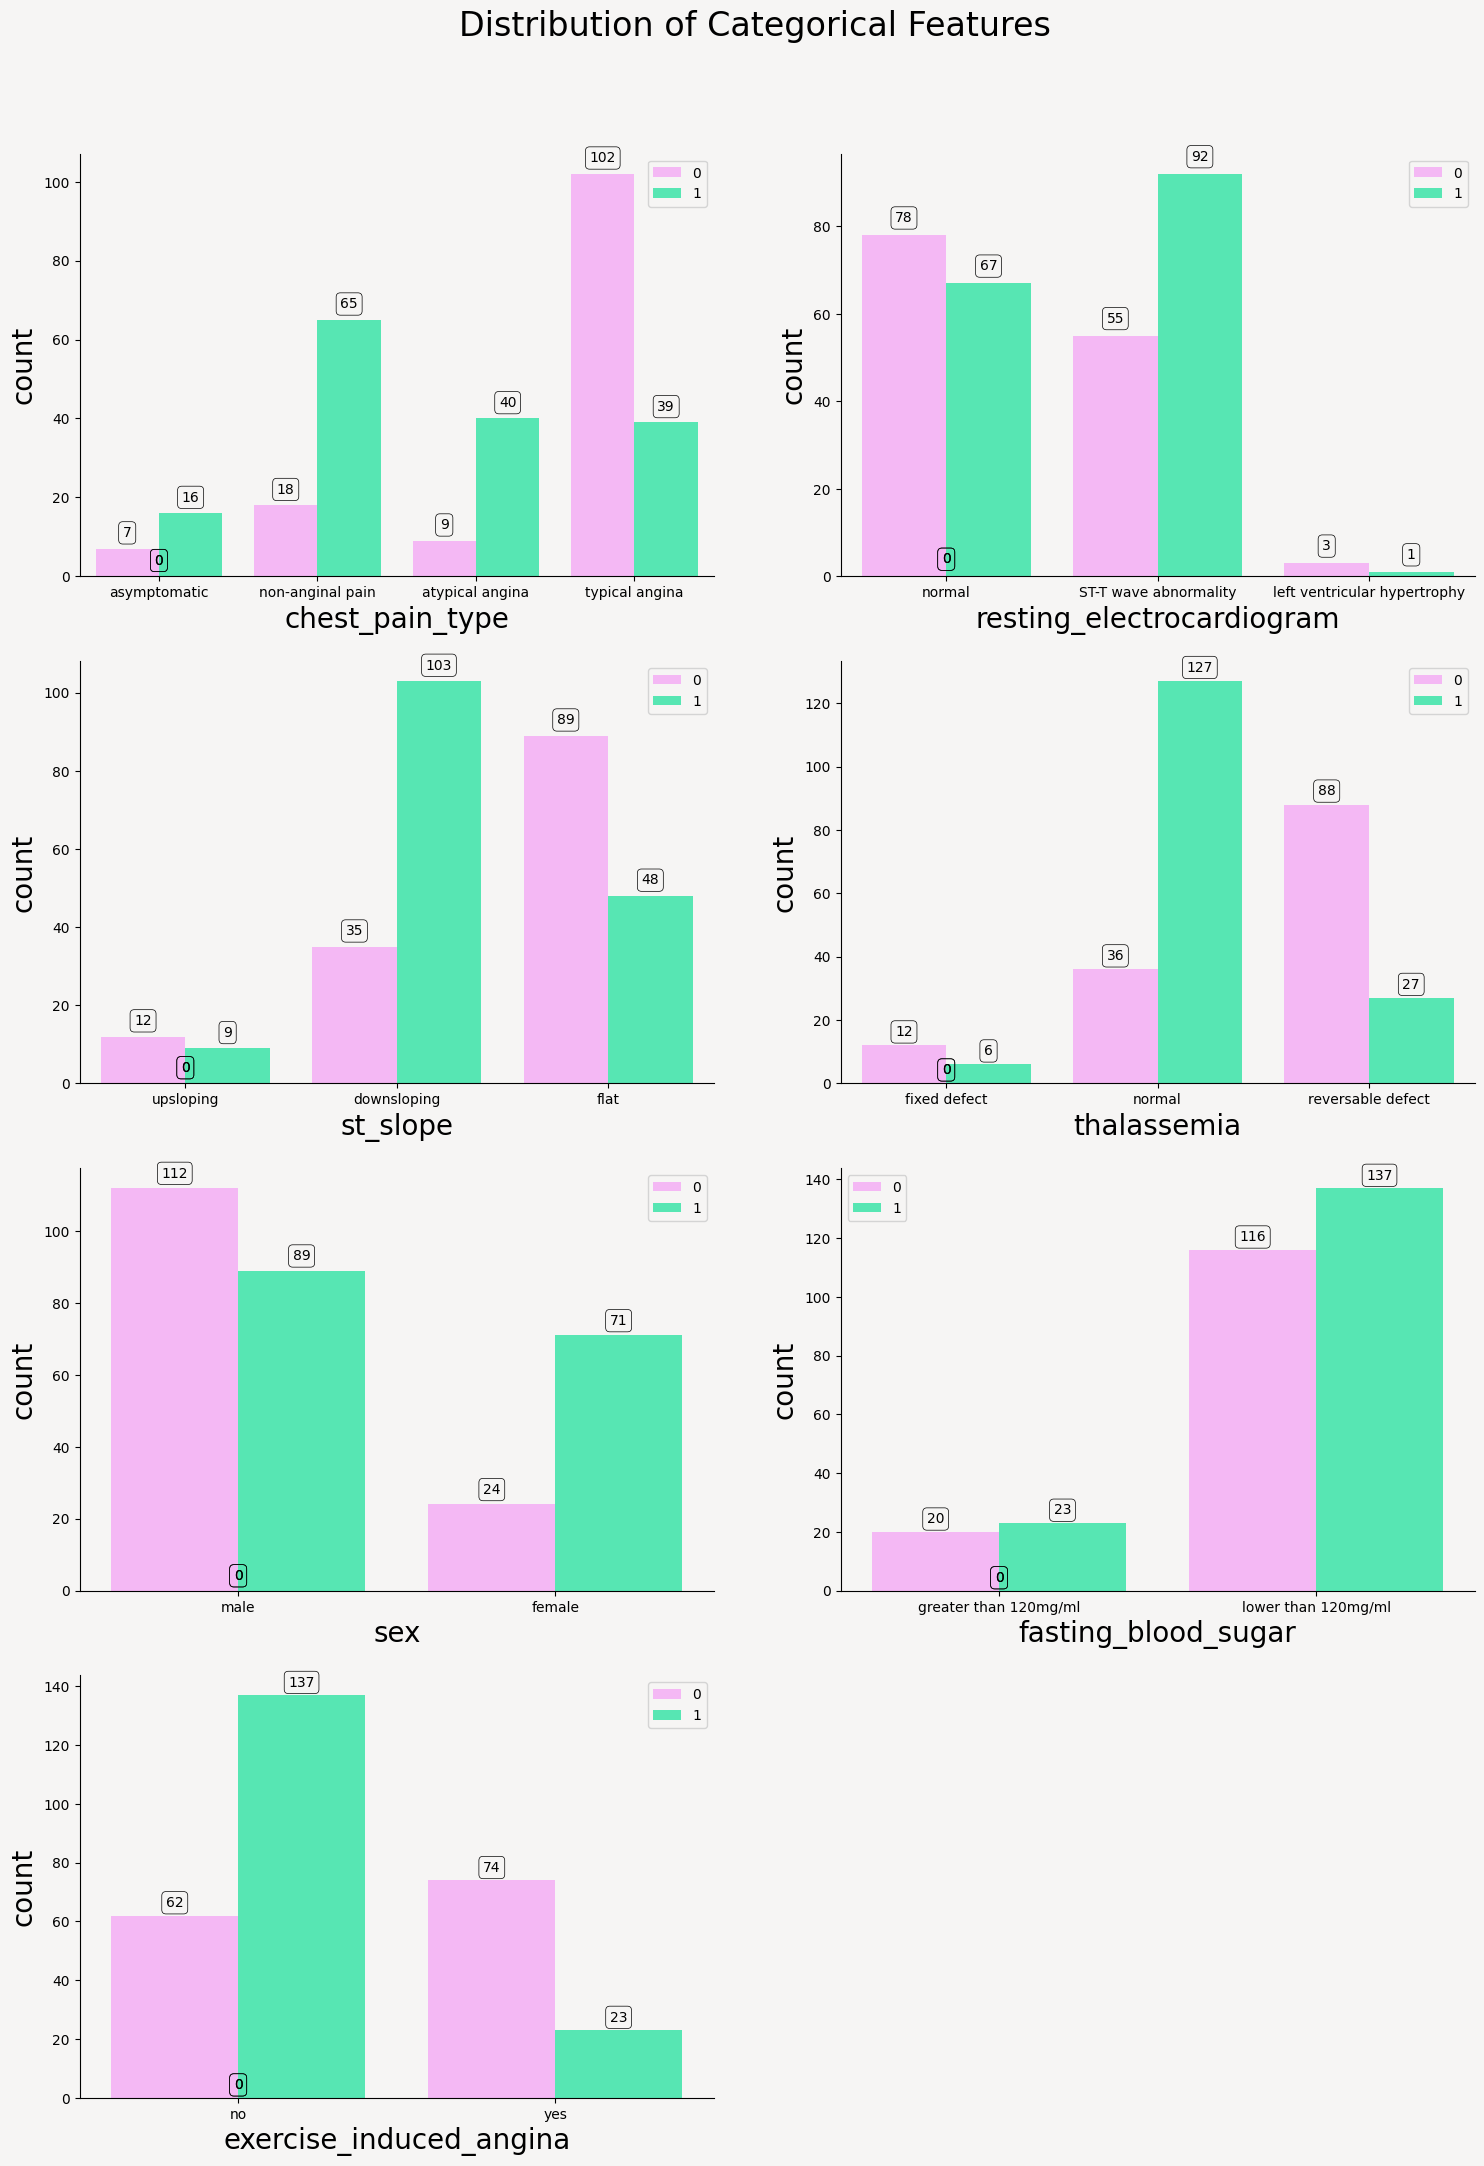

In [51]:
# To visulaized data to get more info

def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

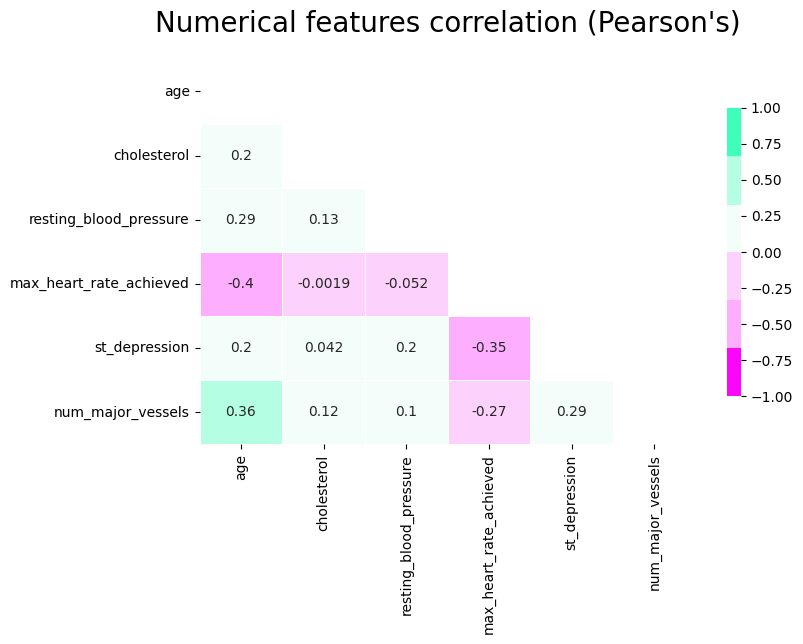

In [52]:
# Correlation Heatmap

df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

**EDA summary:**

-->Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!

-->Data has no missing values

-->Features (columns) data type: Six features are numerical

-->The rest (seven features) are categorical variables Target variable is fairly balanced, 54% no-disease to 46% has-disease

--> Correlations: From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.

**Predictions**

-> **Note**: We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions.

**Scikit-learn classifier:**



In [61]:
# import require libraries for scikit-learn.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

In [62]:

def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    data = data_encoded

    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        # confusion matric, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])

        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [63]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

**Performance metrics summary table:**

In [65]:
def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = [] # initialize as a list

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        # confusion matric, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])

        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        # Append a dictionary to the list
        data_table.append({
            "Classifier": name,
            "Accuracy": accuracy*100,
            "ROC_AUC": roc_auc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        })

    # Create the DataFrame after the loop
    data_table = pd.DataFrame(data_table, columns=cols)
    return(np.round(data_table.reset_index(drop=True), 2))

In [66]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,86.490000,0.920000,0.910000,0.820000,0.860000
9,Linear DA,85.140000,0.920000,0.890000,0.820000,0.850000
10,Quadratic DA,85.140000,0.900000,0.830000,0.850000,0.840000
5,Random Forest,83.780000,0.920000,0.830000,0.830000,0.830000
4,Decision Tree,82.430000,0.820000,0.830000,0.810000,0.820000
6,AdaBoost,82.430000,0.860000,0.910000,0.760000,0.830000
7,Gradient Boosting,82.430000,0.900000,0.890000,0.780000,0.830000
8,Naive Bayes,82.430000,0.920000,0.860000,0.790000,0.820000
3,Nu SVC,81.080000,0.910000,0.910000,0.740000,0.820000
11,Neural Net,78.380000,0.880000,0.940000,0.700000,0.800000


-> Now, we have seen all the performance metrics of the classifiers, it is decision time for us to choose the best possible classifier algorithm.

-> Based on precision LR ranks first (86%); whereas if we see the recall, Neural Nets ranks first with 94%.

**NOTE **: Suggest that choose the model which has highest F-score.

---